In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
import seaborn as sns
import itertools
import warnings
warnings.simplefilter("ignore")
import time

In [2]:
data=pd.read_csv("Part- 1,2&3 - Signal.csv")

In [3]:
data.dtypes

Parameter 1        float64
Parameter 2        float64
Parameter 3        float64
Parameter 4        float64
Parameter 5        float64
Parameter 6        float64
Parameter 7        float64
Parameter 8        float64
Parameter 9        float64
Parameter 10       float64
Parameter 11       float64
Signal_Strength      int64
dtype: object

In [4]:
data.describe().T

count       mean        std      min      25%       50%  \
Parameter 1      1599.0   8.319637   1.741096  4.60000   7.1000   7.90000   
Parameter 2      1599.0   0.527821   0.179060  0.12000   0.3900   0.52000   
Parameter 3      1599.0   0.270976   0.194801  0.00000   0.0900   0.26000   
Parameter 4      1599.0   2.538806   1.409928  0.90000   1.9000   2.20000   
Parameter 5      1599.0   0.087467   0.047065  0.01200   0.0700   0.07900   
Parameter 6      1599.0  15.874922  10.460157  1.00000   7.0000  14.00000   
Parameter 7      1599.0  46.467792  32.895324  6.00000  22.0000  38.00000   
Parameter 8      1599.0   0.996747   0.001887  0.99007   0.9956   0.99675   
Parameter 9      1599.0   3.311113   0.154386  2.74000   3.2100   3.31000   
Parameter 10     1599.0   0.658149   0.169507  0.33000   0.5500   0.62000   
Parameter 11     1599.0  10.422983   1.065668  8.40000   9.5000  10.20000   
Signal_Strength  1599.0   5.636023   0.807569  3.00000   5.0000   6.00000   

                       75%        max  
Parameter 1       9.200000   15.90000  
Parameter 2       0.640000    1.58000  
Parameter 3       0.420000    1.00000  
Parameter 4       2.600000   15.50000  
Parameter 5       0.090000    0.61100  
Parameter 6      21.000000   72.00000  
Parameter 7      62.000000  289.00000  
Parameter 8       0.997835    1.00369  
Parameter 9       3.400000    4.01000  
Parameter 10      0.730000    2.00000  
Parameter 11     11.100000   14.90000  
Signal_Strength   6.000000    8.00000

In [5]:
data.shape

(1599, 12)

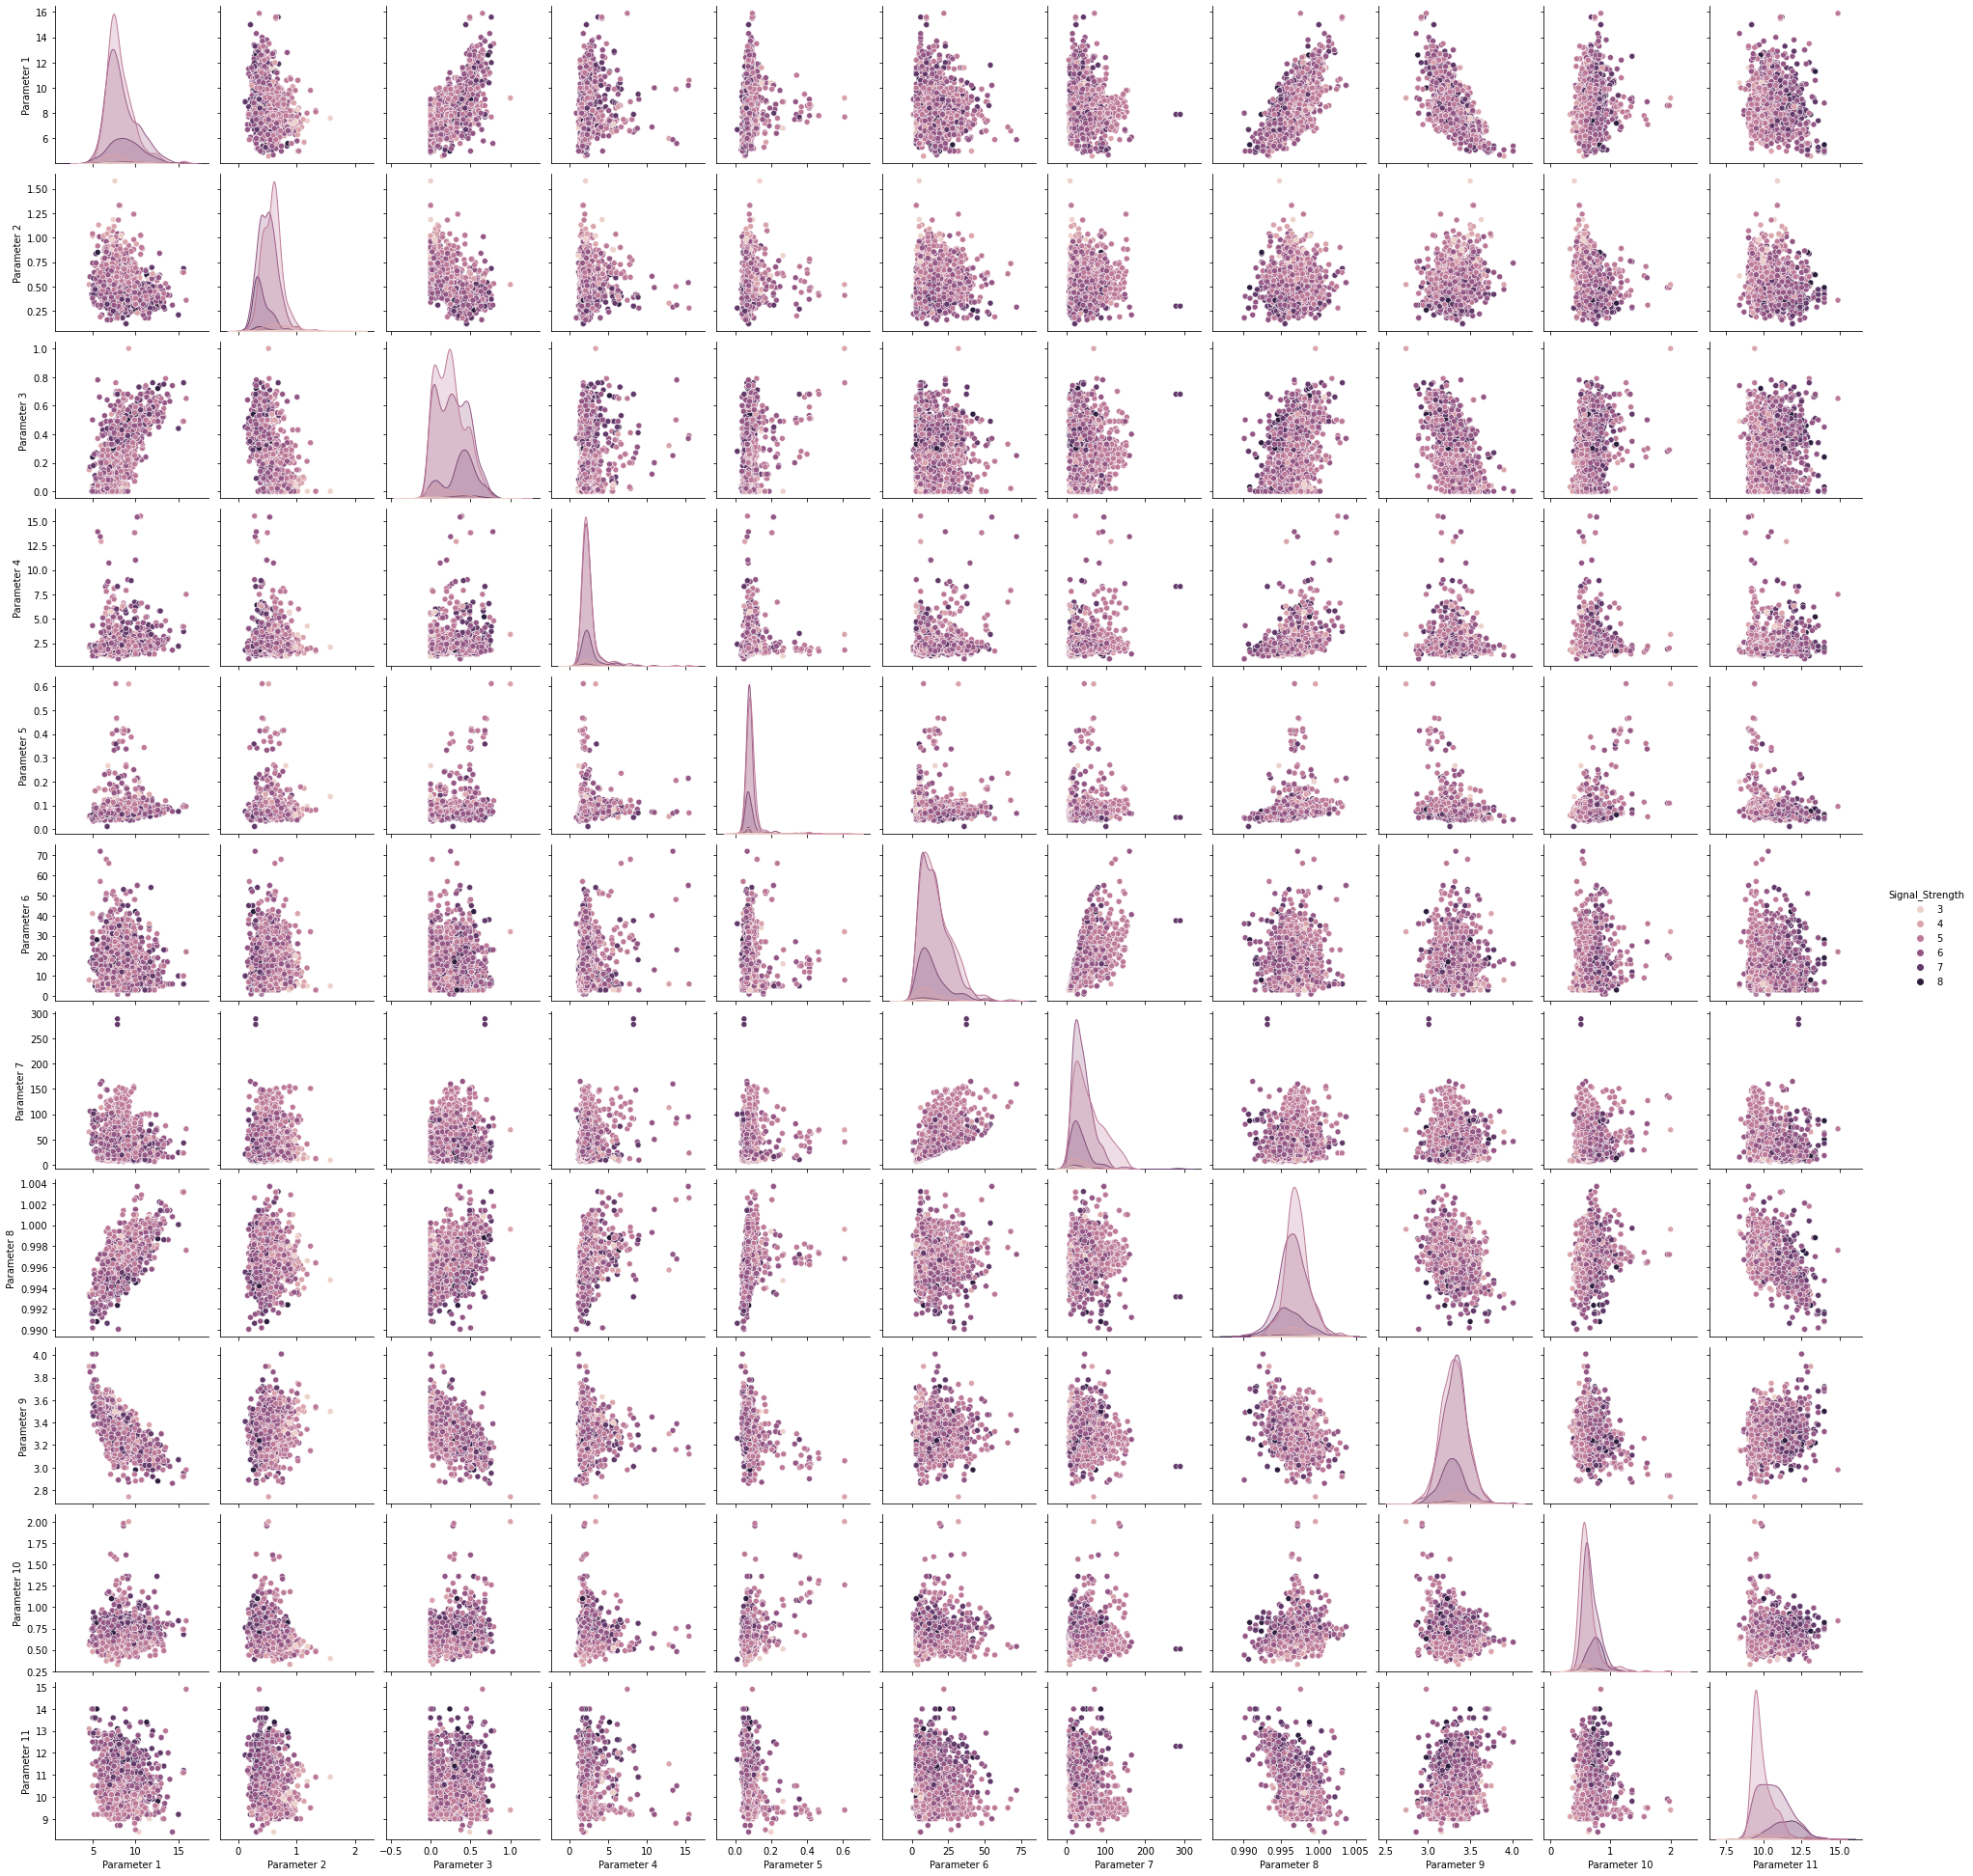

In [6]:

sns.pairplot(data,hue="Signal_Strength")

<AxesSubplot:>

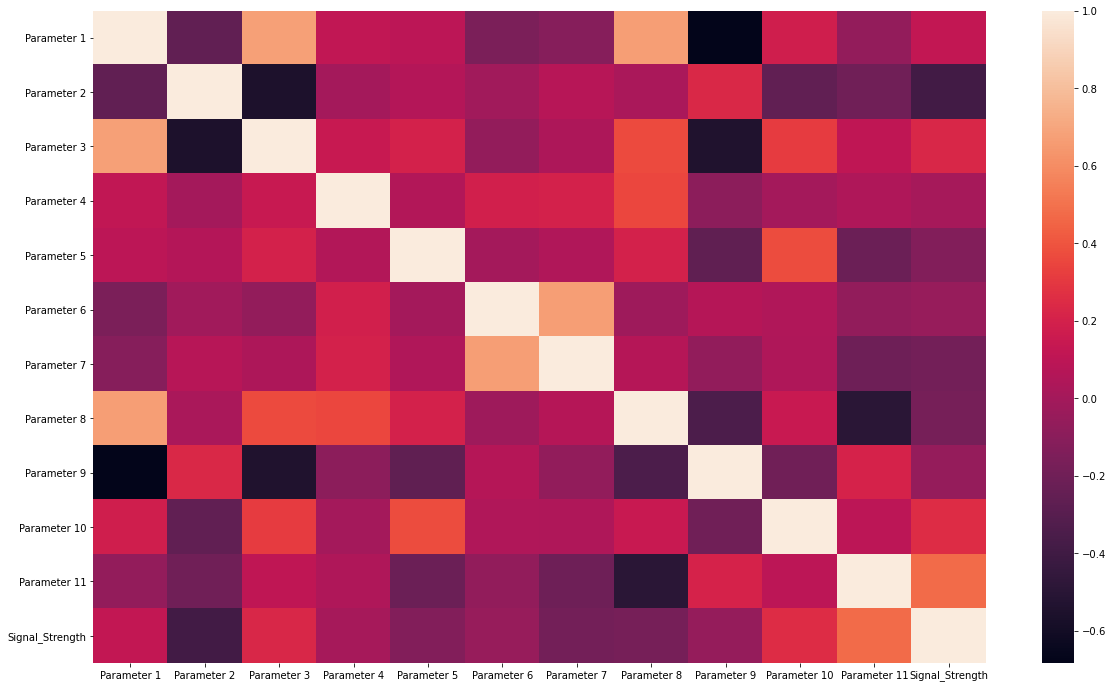

In [7]:
plt.figure(figsize=(20,12))
sns.heatmap(data.corr())

<AxesSubplot:>

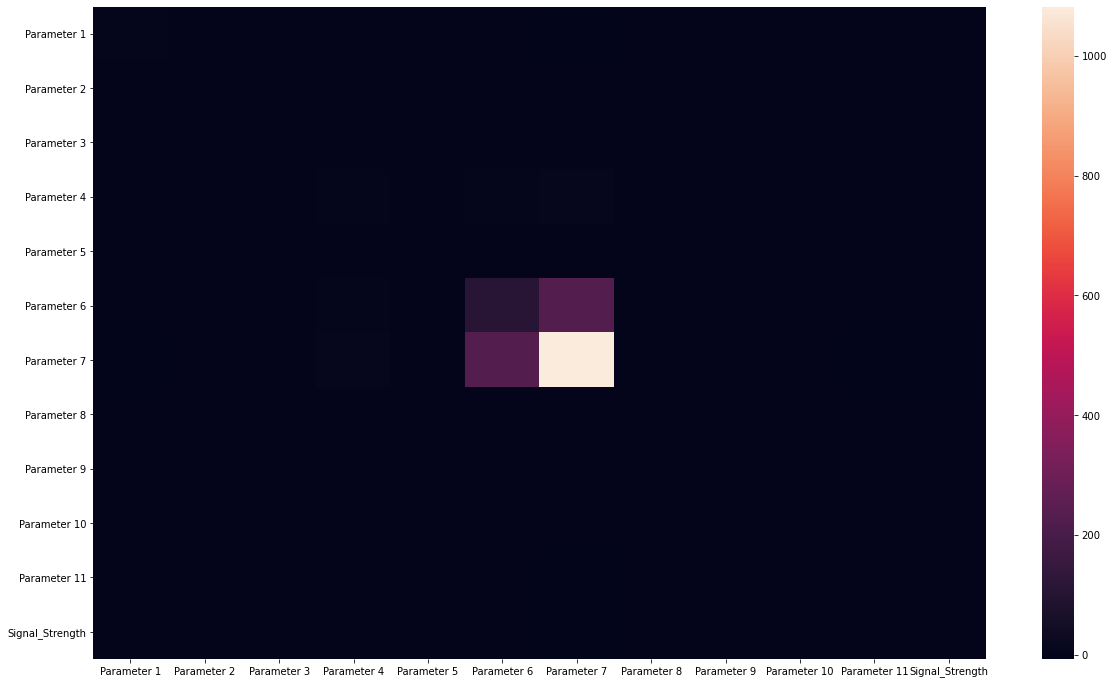

In [8]:
plt.figure(figsize=(20,12))
sns.heatmap(data.cov())

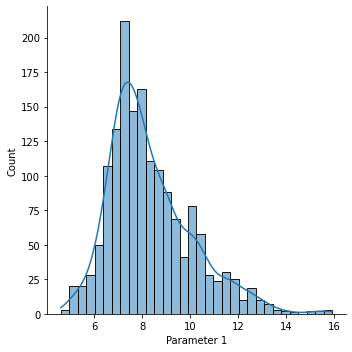

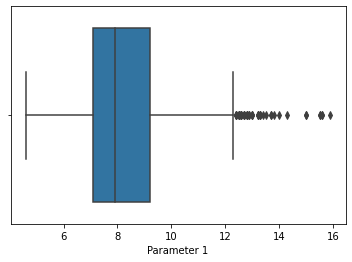

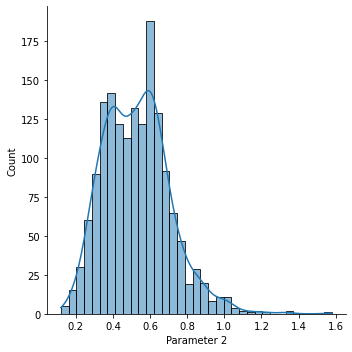

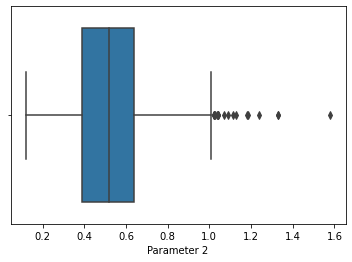

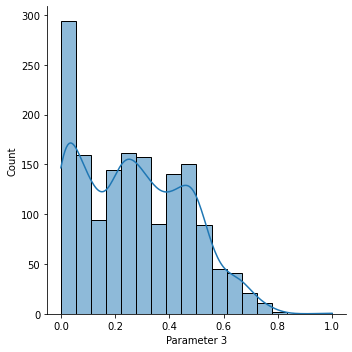

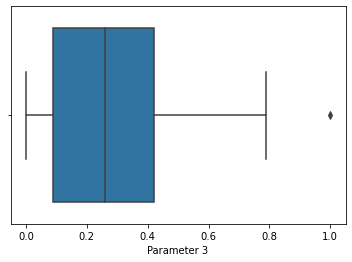

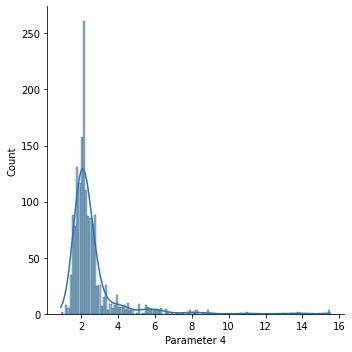

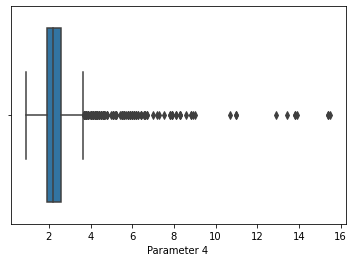

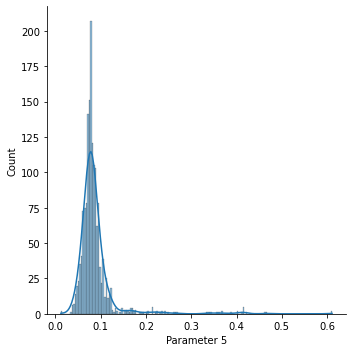

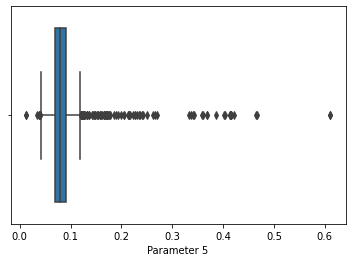

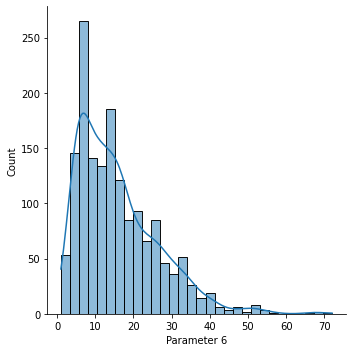

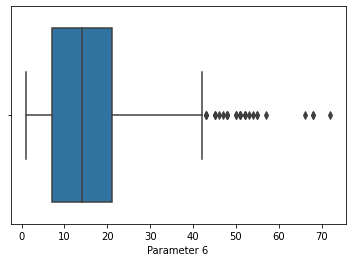

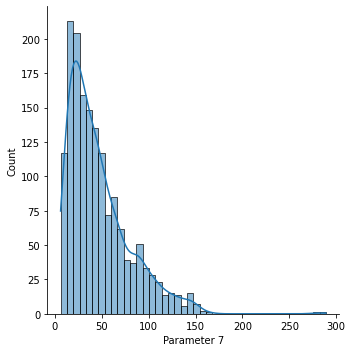

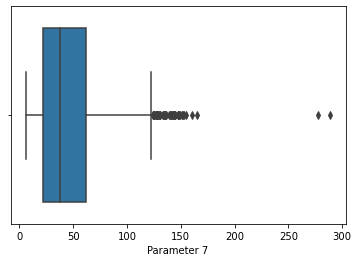

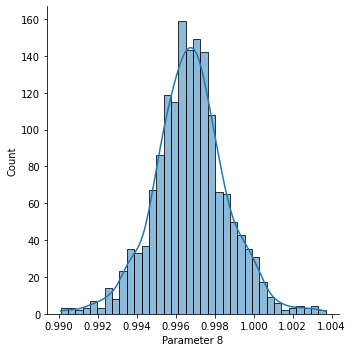

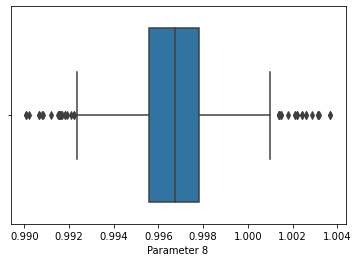

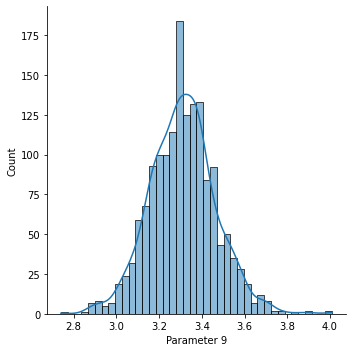

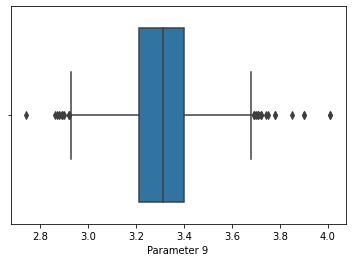

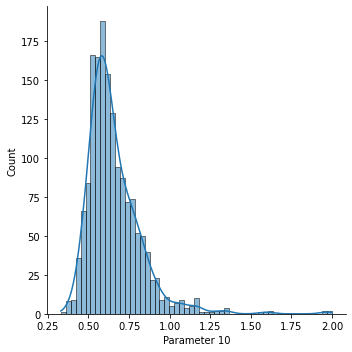

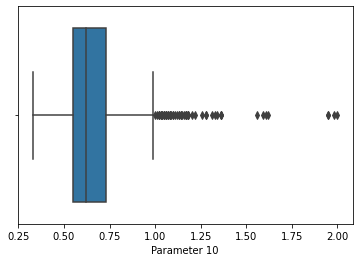

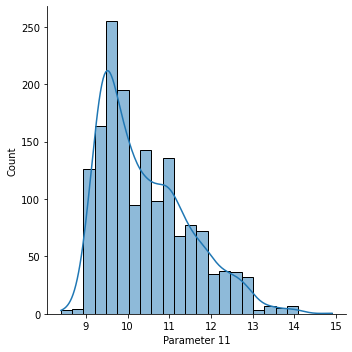

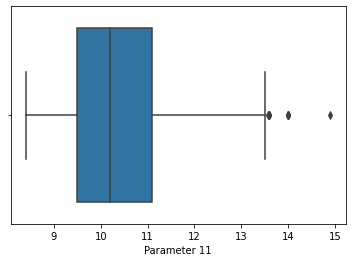

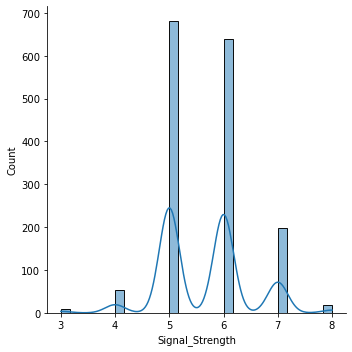

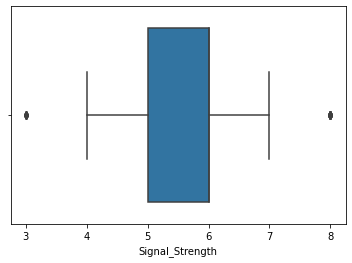

In [9]:
for each in data.columns:
    #plt.subplot(1,2,1)
    sns.displot(data=data[each],kde=True)
    plt.show()
    #plt.subplot(1,2,2)
    sns.boxplot(x=data[each])
    plt.show()
    plt.close()

In [10]:
data.dtypes


Parameter 1        float64
Parameter 2        float64
Parameter 3        float64
Parameter 4        float64
Parameter 5        float64
Parameter 6        float64
Parameter 7        float64
Parameter 8        float64
Parameter 9        float64
Parameter 10       float64
Parameter 11       float64
Signal_Strength      int64
dtype: object

<AxesSubplot:xlabel='Signal_Strength', ylabel='count'>

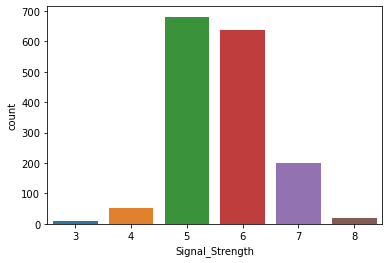

In [11]:
sns.countplot(x=data["Signal_Strength"])

In [12]:
data["Signal_Strength"]=data["Signal_Strength"].astype("category")

In [13]:
data.dtypes

Parameter 1         float64
Parameter 2         float64
Parameter 3         float64
Parameter 4         float64
Parameter 5         float64
Parameter 6         float64
Parameter 7         float64
Parameter 8         float64
Parameter 9         float64
Parameter 10        float64
Parameter 11        float64
Signal_Strength    category
dtype: object

<AxesSubplot:xlabel='Parameter 1', ylabel='Signal_Strength'>

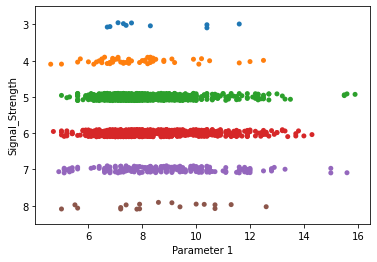

In [14]:
sns.stripplot(data=data,x="Parameter 1",y="Signal_Strength")

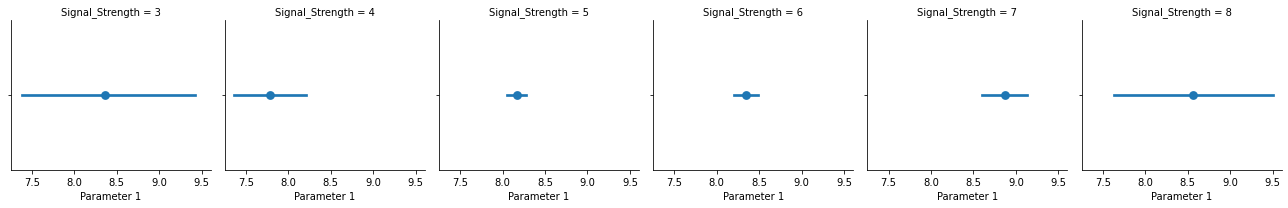

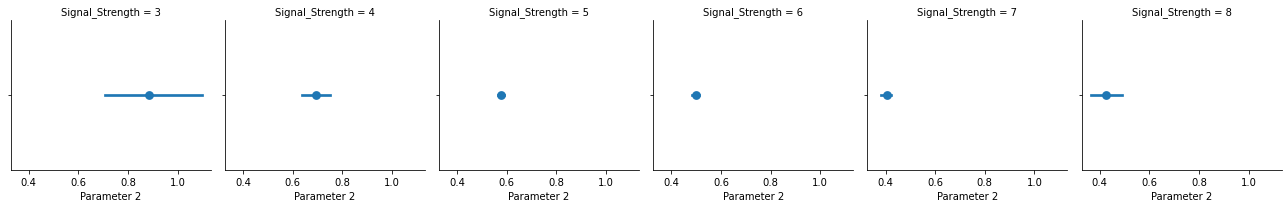

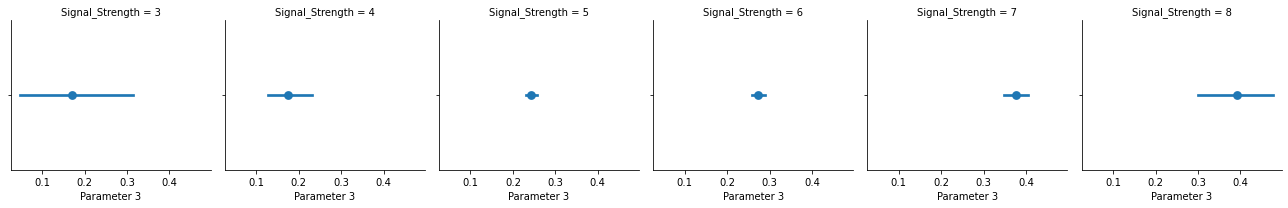

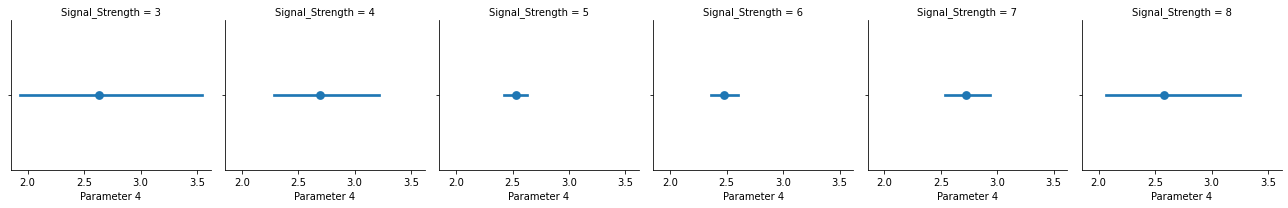

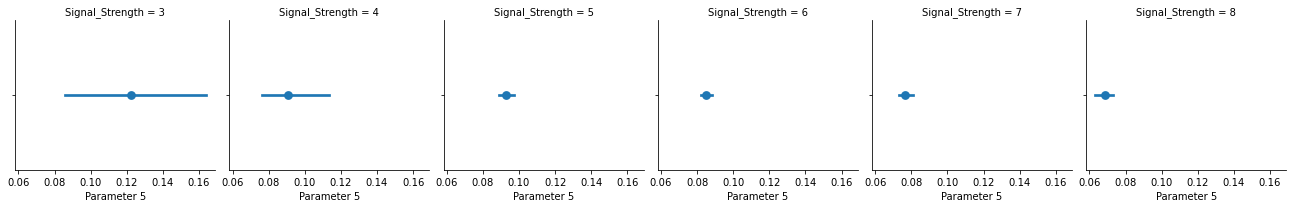

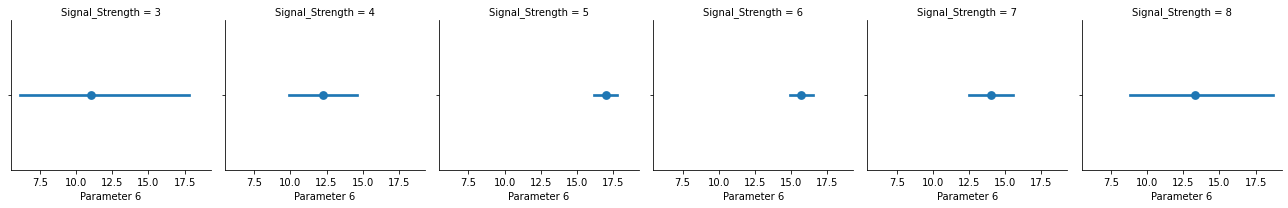

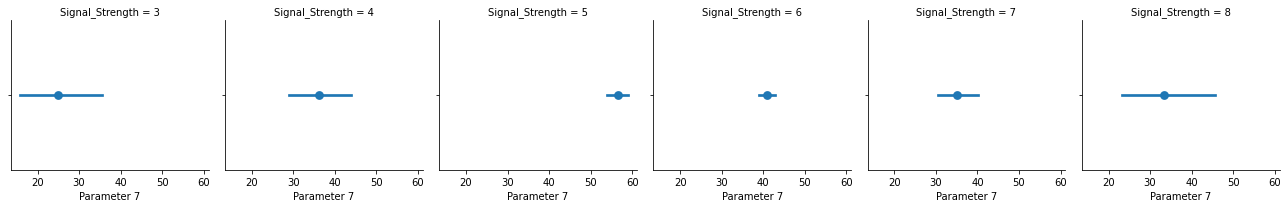

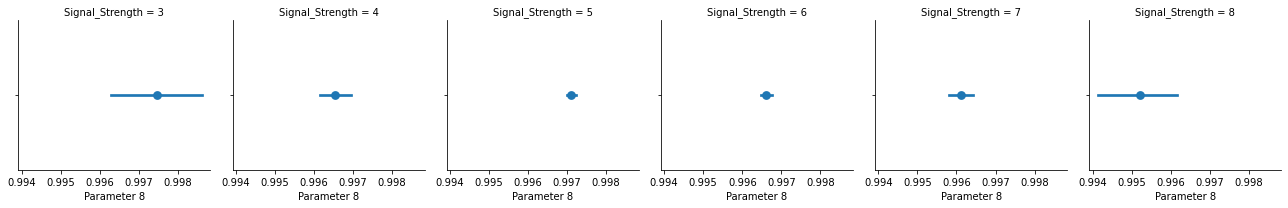

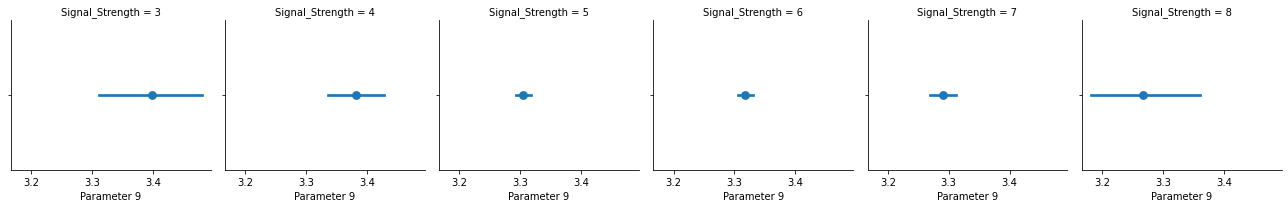

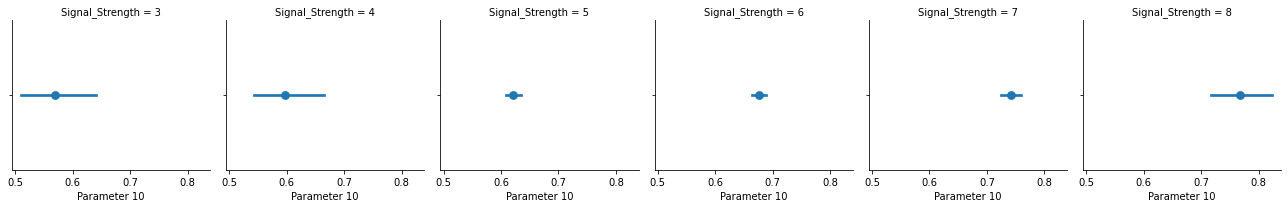

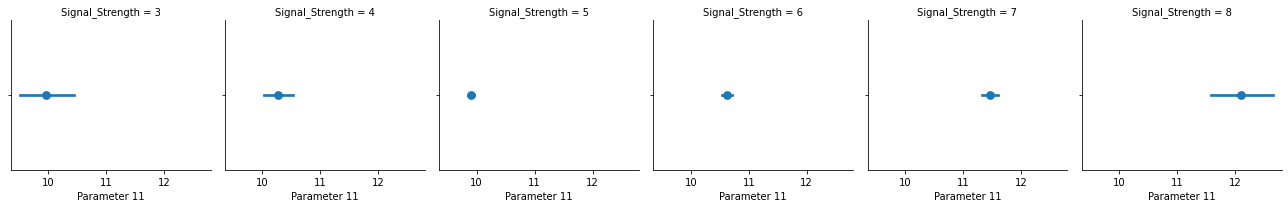

In [15]:
for each in data.columns.drop("Signal_Strength"):
    grid=sns.FacetGrid(data, col="Signal_Strength")
    grid.map(sns.pointplot,each)
    #grid.add_legend()

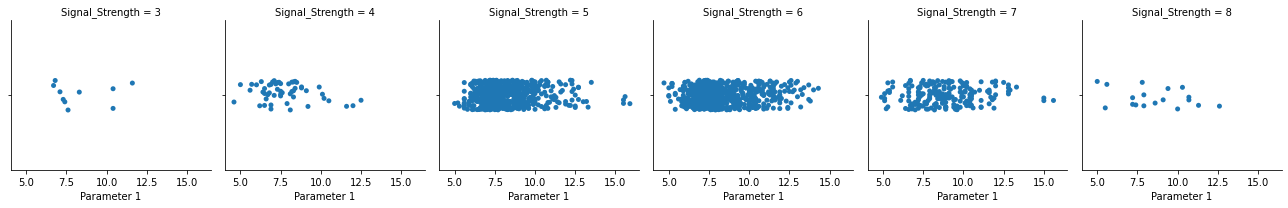

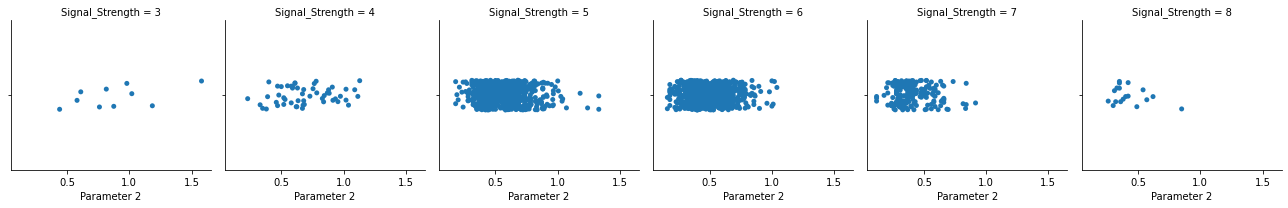

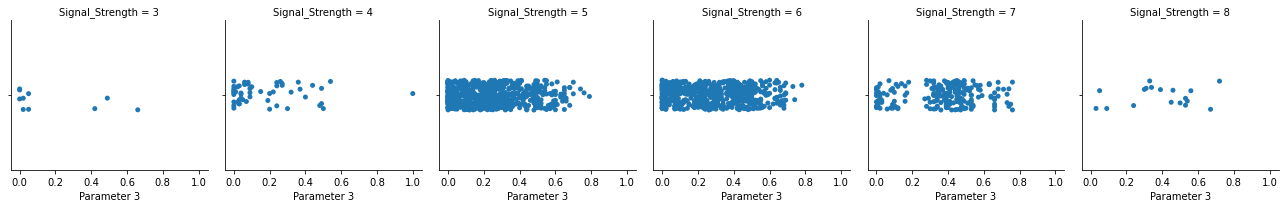

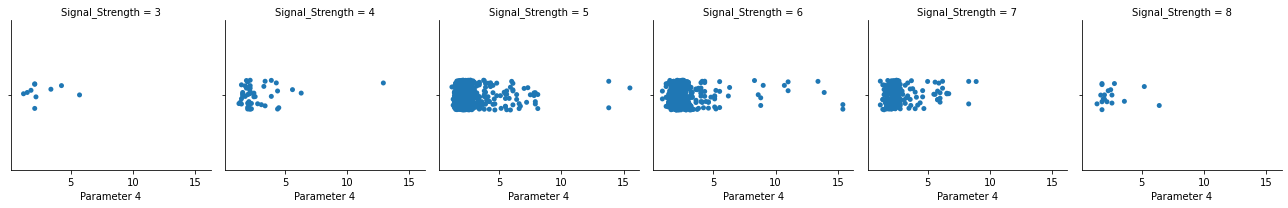

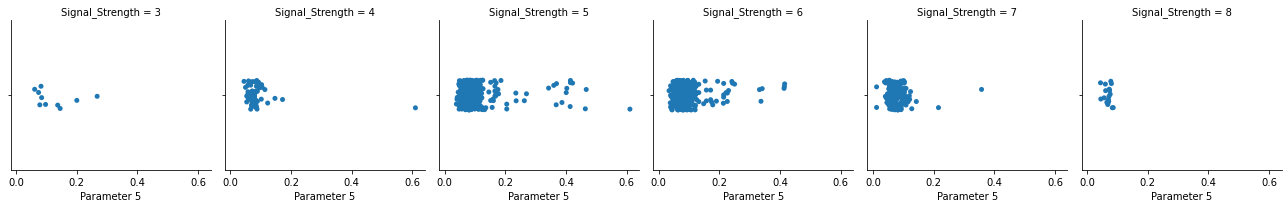

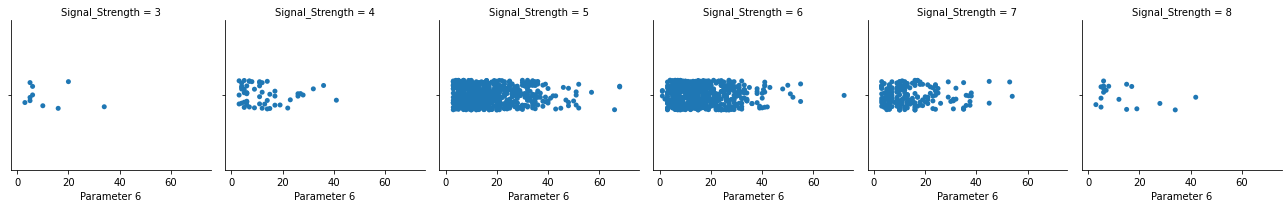

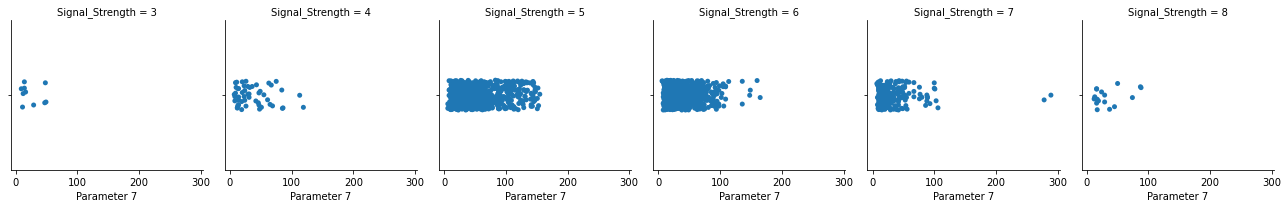

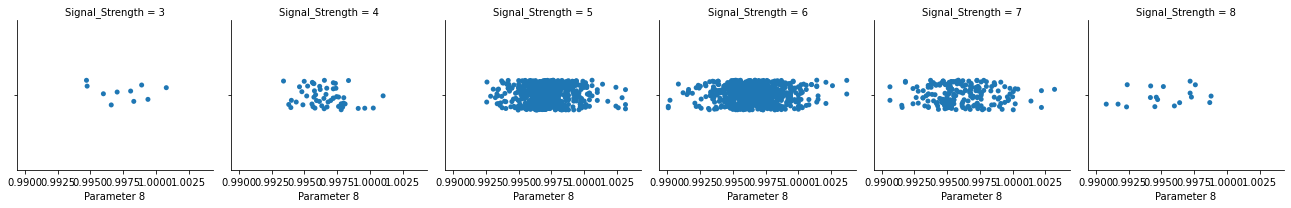

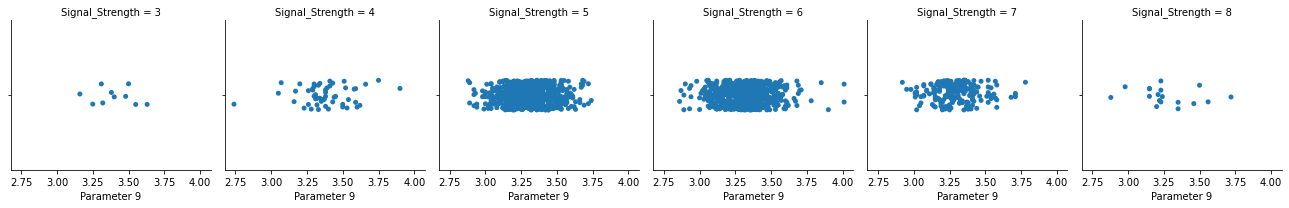

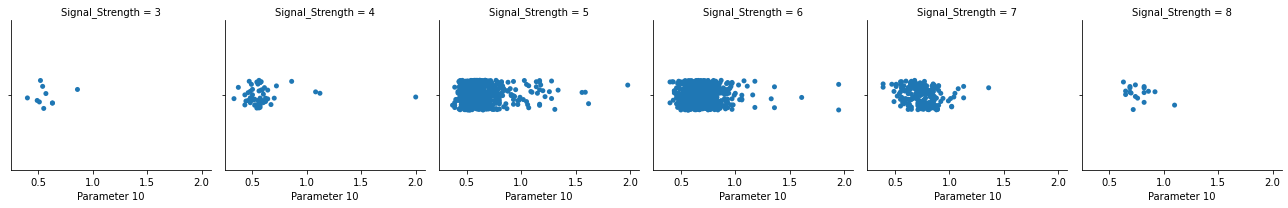

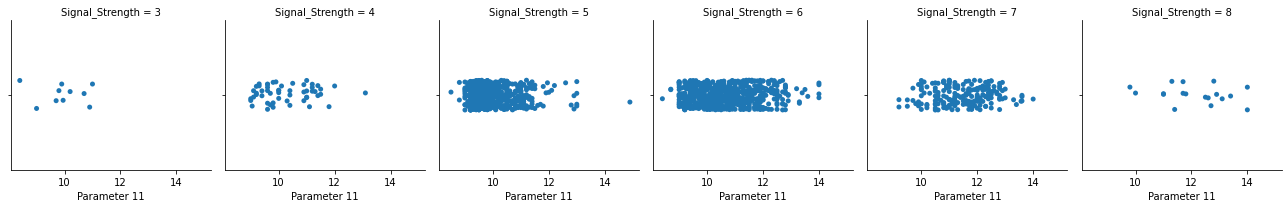

In [16]:
for each in data.columns.drop("Signal_Strength"):
    grid=sns.FacetGrid(data, col="Signal_Strength")
    grid.map(sns.stripplot,each)
    #grid.add_legend()

Looks like there is some particular orientations within the parameters that tend to go more towards right for higher qualtiy signals, on an average, and towards to the left for lower quality signals. The points, along with their mean points seem to be particularly oriented thus. We need to check it out by groupings.


In [17]:
data_groups=data.groupby("Signal_Strength")

In [18]:
data_groups.groups

{3: [459, 517, 690, 832, 899, 1299, 1374, 1469, 1478, 1505], 4: [18, 38, 41, 45, 73, 79, 94, 151, 161, 167, 170, 199, 224, 261, 266, 409, 573, 576, 600, 633, 647, 659, 703, 704, 724, 813, 830, 833, 872, 876, 927, 937, 1124, 1176, 1189, 1233, 1235, 1238, 1239, 1261, 1263, 1276, 1293, 1307, 1363, 1369, 1423, 1461, 1467, 1480, 1482, 1484, 1521], 5: [0, 1, 2, 4, 5, 6, 9, 10, 11, 12, 13, 14, 15, 17, 21, 22, 23, 25, 26, 27, 28, 30, 32, 34, 39, 40, 43, 44, 46, 47, 48, 49, 50, 53, 55, 56, 57, 58, 60, 61, 63, 64, 65, 66, 67, 68, 71, 72, 74, 75, 76, 78, 80, 81, 82, 83, 85, 87, 88, 89, 90, 92, 93, 96, 97, 98, 103, 104, 105, 106, 107, 109, 110, 111, 112, 114, 120, 122, 123, 124, 125, 126, 127, 129, 130, 131, 132, 135, 136, 137, 138, 139, 140, 141, 143, 145, 146, 147, 152, 153, ...], 6: [3, 19, 20, 24, 29, 31, 33, 35, 36, 42, 51, 52, 54, 59, 69, 70, 77, 84, 86, 91, 95, 99, 100, 101, 102, 108, 113, 115, 116, 117, 118, 119, 121, 133, 134, 142, 144, 148, 149, 150, 159, 162, 168, 171, 172, 173, 177, 18

In [19]:
data_comparison_groups={}
for each in data_groups.groups:
    data_to={}
    temp=data_groups.get_group(each).describe().T
    #print(temp["mean"])
    data_to.update({'mean':temp["mean"],'std':temp["std"],'50%':temp["50%"]})
    data_comparison_groups.update({each:data_to})

In [20]:
data_comparison=pd.DataFrame(data_comparison_groups)

In [21]:
data_comparison.T

mean  \
3  Parameter 1      8.360000
Parameter 2      0.8...   
4  Parameter 1      7.779245
Parameter 2      0.6...   
5  Parameter 1      8.167254
Parameter 2      0.5...   
6  Parameter 1      8.347179
Parameter 2      0.4...   
7  Parameter 1      8.872362
Parameter 2      0.4...   
8  Parameter 1      8.566667
Parameter 2      0.4...   

                                                 std  \
3  Parameter 1      1.770875
Parameter 2      0.3...   
4  Parameter 1      1.626624
Parameter 2      0.2...   
5  Parameter 1      1.563988
Parameter 2      0.1...   
6  Parameter 1      1.797849
Parameter 2      0.1...   
7  Parameter 1      1.992483
Parameter 2      0.1...   
8  Parameter 1      2.119656
Parameter 2      0.1...   

                                                 50%  
3  Parameter 1      7.500000
Parameter 2      0.8...  
4  Parameter 1      7.5000
Parameter 2      0.670...  
5  Parameter 1      7.800
Parameter 2      0.580
...  
6  Parameter 1      7.90000
Parameter 2      0.49...  
7  Parameter 1      8.80000
Parameter 2      0.37...  
8  Parameter 1      8.25000
Parameter 2      0.37...

In [22]:
data_groups.groups

{3: [459, 517, 690, 832, 899, 1299, 1374, 1469, 1478, 1505], 4: [18, 38, 41, 45, 73, 79, 94, 151, 161, 167, 170, 199, 224, 261, 266, 409, 573, 576, 600, 633, 647, 659, 703, 704, 724, 813, 830, 833, 872, 876, 927, 937, 1124, 1176, 1189, 1233, 1235, 1238, 1239, 1261, 1263, 1276, 1293, 1307, 1363, 1369, 1423, 1461, 1467, 1480, 1482, 1484, 1521], 5: [0, 1, 2, 4, 5, 6, 9, 10, 11, 12, 13, 14, 15, 17, 21, 22, 23, 25, 26, 27, 28, 30, 32, 34, 39, 40, 43, 44, 46, 47, 48, 49, 50, 53, 55, 56, 57, 58, 60, 61, 63, 64, 65, 66, 67, 68, 71, 72, 74, 75, 76, 78, 80, 81, 82, 83, 85, 87, 88, 89, 90, 92, 93, 96, 97, 98, 103, 104, 105, 106, 107, 109, 110, 111, 112, 114, 120, 122, 123, 124, 125, 126, 127, 129, 130, 131, 132, 135, 136, 137, 138, 139, 140, 141, 143, 145, 146, 147, 152, 153, ...], 6: [3, 19, 20, 24, 29, 31, 33, 35, 36, 42, 51, 52, 54, 59, 69, 70, 77, 84, 86, 91, 95, 99, 100, 101, 102, 108, 113, 115, 116, 117, 118, 119, 121, 133, 134, 142, 144, 148, 149, 150, 159, 162, 168, 171, 172, 173, 177, 18

In [23]:
pd.DataFrame(data_comparison[3]["mean"])

mean
Parameter 1    8.360000
Parameter 2    0.884500
Parameter 3    0.171000
Parameter 4    2.635000
Parameter 5    0.122500
Parameter 6   11.000000
Parameter 7   24.900000
Parameter 8    0.997464
Parameter 9    3.398000
Parameter 10   0.570000
Parameter 11   9.955000

In [24]:
dataframe_taken={}
for cate in data_comparison.T.columns:
    temp=pd.DataFrame()
    temp2=pd.DataFrame()
    for each in data_groups.groups:
        print(cate,each)
        print(data_comparison[each][cate])
        #print(data_comparison[each][cate])
        temp[each]=data_comparison[each][cate]
        #temp
        #temp2[cate]=data_comparison[cate][each]
        #print(data_comparison[each][cate])
        print(temp[each])
        #print(temp2[cate])
        #print(each)
    print(" \ntoken end\n")
    dataframe_taken.update({cate : temp})
       

mean 3
Parameter 1      8.360000
Parameter 2      0.884500
Parameter 3      0.171000
Parameter 4      2.635000
Parameter 5      0.122500
Parameter 6     11.000000
Parameter 7     24.900000
Parameter 8      0.997464
Parameter 9      3.398000
Parameter 10     0.570000
Parameter 11     9.955000
Name: mean, dtype: float64
Parameter 1      8.360000
Parameter 2      0.884500
Parameter 3      0.171000
Parameter 4      2.635000
Parameter 5      0.122500
Parameter 6     11.000000
Parameter 7     24.900000
Parameter 8      0.997464
Parameter 9      3.398000
Parameter 10     0.570000
Parameter 11     9.955000
Name: 3, dtype: float64
mean 4
Parameter 1      7.779245
Parameter 2      0.693962
Parameter 3      0.174151
Parameter 4      2.694340
Parameter 5      0.090679
Parameter 6     12.264151
Parameter 7     36.245283
Parameter 8      0.996542
Parameter 9      3.381509
Parameter 10     0.596415
Parameter 11    10.265094
Name: mean, dtype: float64
Parameter 1      7.779245
Parameter 2      0.69396

In [25]:
dataframe_taken["std"] #Standard Deviations for varios parameters arranged according to the mean of the corresponding signal strength

3          4          5          6          7          8
Parameter 1    1.770875   1.626624   1.563988   1.797849   1.992483   2.119656
Parameter 2    0.331256   0.220110   0.164801   0.160962   0.145224   0.144914
Parameter 3    0.250664   0.201030   0.180003   0.195108   0.194432   0.199526
Parameter 4    1.401596   1.789436   1.359753   1.441576   1.371509   1.295038
Parameter 5    0.066241   0.076192   0.053707   0.039563   0.029456   0.011678
Parameter 6    9.763879   9.025926  10.955446   9.940911  10.175255  11.155613
Parameter 7   16.828877  27.583374  36.993116  25.038250  33.191206  25.433240
Parameter 8    0.002002   0.001575   0.001589   0.002000   0.002176   0.002378
Parameter 9    0.144052   0.181441   0.150618   0.153995   0.150101   0.200640
Parameter 10   0.122020   0.239391   0.171062   0.158650   0.135639   0.115379
Parameter 11   0.818009   0.934776   0.736521   1.049639   0.961933   1.224011

In [26]:
dataframe_taken["std"].T

Parameter 1  Parameter 2  Parameter 3  Parameter 4  Parameter 5  \
3     1.770875     0.331256     0.250664     1.401596     0.066241   
4     1.626624     0.220110     0.201030     1.789436     0.076192   
5     1.563988     0.164801     0.180003     1.359753     0.053707   
6     1.797849     0.160962     0.195108     1.441576     0.039563   
7     1.992483     0.145224     0.194432     1.371509     0.029456   
8     2.119656     0.144914     0.199526     1.295038     0.011678   

   Parameter 6  Parameter 7  Parameter 8  Parameter 9  Parameter 10  \
3     9.763879    16.828877     0.002002     0.144052      0.122020   
4     9.025926    27.583374     0.001575     0.181441      0.239391   
5    10.955446    36.993116     0.001589     0.150618      0.171062   
6     9.940911    25.038250     0.002000     0.153995      0.158650   
7    10.175255    33.191206     0.002176     0.150101      0.135639   
8    11.155613    25.433240     0.002378     0.200640      0.115379   

   Parameter 11  
3      0.818009  
4      0.934776  
5      0.736521  
6      1.049639  
7      0.961933  
8      1.224011

In [27]:
dataframe_taken["mean"].T

Parameter 1  Parameter 2  Parameter 3  Parameter 4  Parameter 5  \
3     8.360000     0.884500     0.171000     2.635000     0.122500   
4     7.779245     0.693962     0.174151     2.694340     0.090679   
5     8.167254     0.577041     0.243686     2.528855     0.092736   
6     8.347179     0.497484     0.273824     2.477194     0.084956   
7     8.872362     0.403920     0.375176     2.720603     0.076588   
8     8.566667     0.423333     0.391111     2.577778     0.068444   

   Parameter 6  Parameter 7  Parameter 8  Parameter 9  Parameter 10  \
3    11.000000    24.900000     0.997464     3.398000      0.570000   
4    12.264151    36.245283     0.996542     3.381509      0.596415   
5    16.983847    56.513950     0.997104     3.304949      0.620969   
6    15.711599    40.869906     0.996615     3.318072      0.675329   
7    14.045226    35.020101     0.996104     3.290754      0.741256   
8    13.277778    33.444444     0.995212     3.267222      0.767778   

   Parameter 11  
3      9.955000  
4     10.265094  
5      9.899706  
6     10.629519  
7     11.465913  
8     12.094444

In [28]:
dataframe_taken["50%"].T

Parameter 1  Parameter 2  Parameter 3  Parameter 4  Parameter 5  \
3         7.50        0.845        0.035          2.1       0.0905   
4         7.50        0.670        0.090          2.1       0.0800   
5         7.80        0.580        0.230          2.2       0.0810   
6         7.90        0.490        0.260          2.2       0.0780   
7         8.80        0.370        0.400          2.3       0.0730   
8         8.25        0.370        0.420          2.1       0.0705   

   Parameter 6  Parameter 7  Parameter 8  Parameter 9  Parameter 10  \
3          6.0         15.0     0.997565         3.39         0.545   
4         11.0         26.0     0.996500         3.37         0.560   
5         15.0         47.0     0.997000         3.30         0.580   
6         14.0         35.0     0.996560         3.32         0.640   
7         11.0         27.0     0.995770         3.28         0.740   
8          7.5         21.5     0.994940         3.23         0.740   

   Parameter 11  
3         9.925  
4        10.000  
5         9.700  
6        10.500  
7        11.500  
8        12.150

<function matplotlib.pyplot.show(close=None, block=None)>

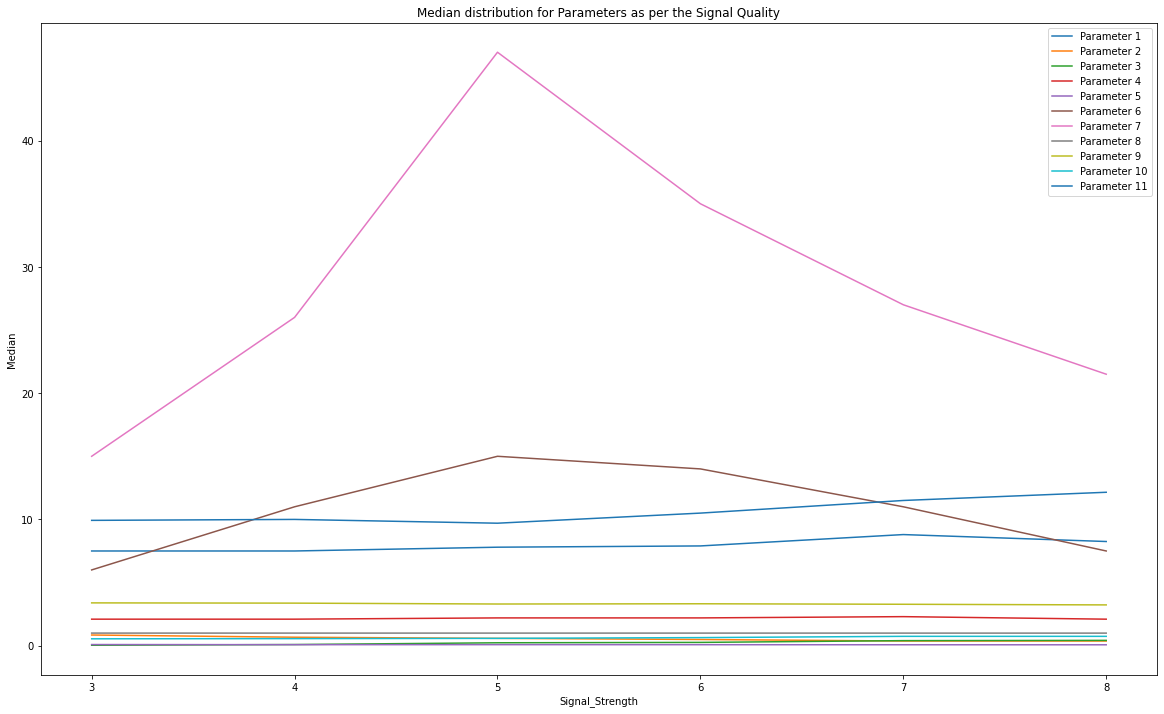

In [29]:
plt.figure(figsize=(20,12))
plt.title("Median distribution for Parameters as per the Signal Quality")
plt.xlabel("Signal_Strength")
plt.ylabel("Median")
plt.plot(dataframe_taken["50%"].T)
plt.legend(dataframe_taken["50%"].T.columns)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

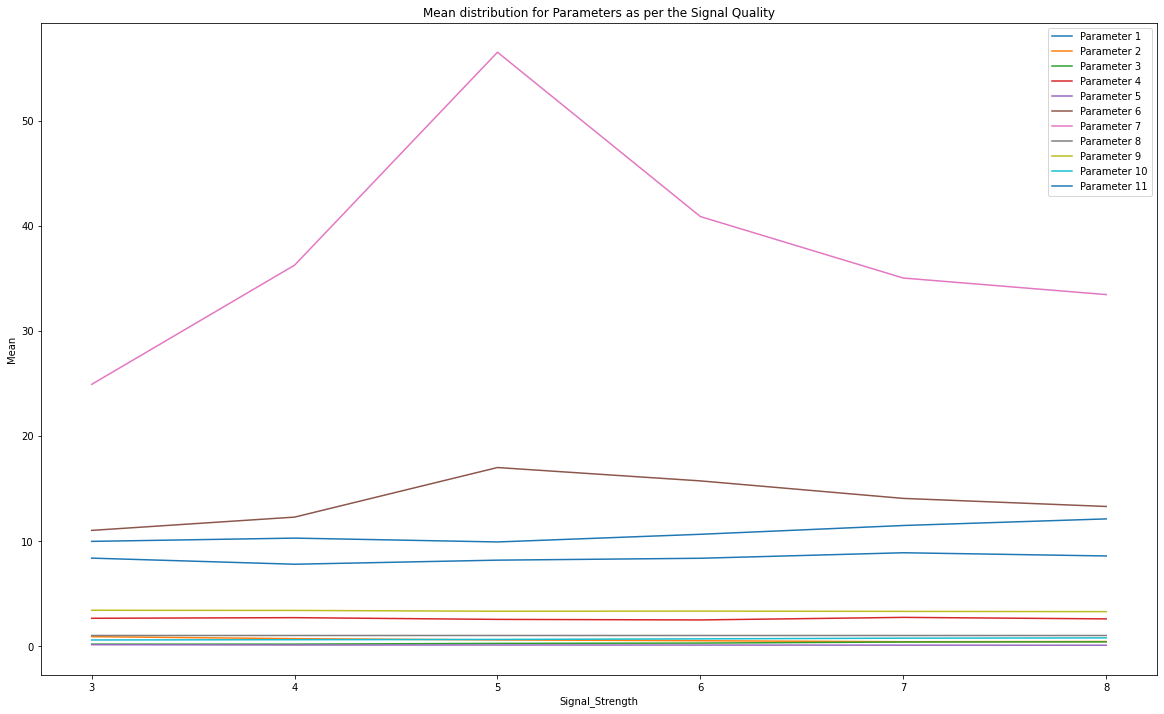

In [30]:
plt.figure(figsize=(20,12))
plt.title("Mean distribution for Parameters as per the Signal Quality")
plt.xlabel("Signal_Strength")
plt.ylabel("Mean")
plt.plot(dataframe_taken["mean"].T)
plt.legend(dataframe_taken["mean"].T.columns)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

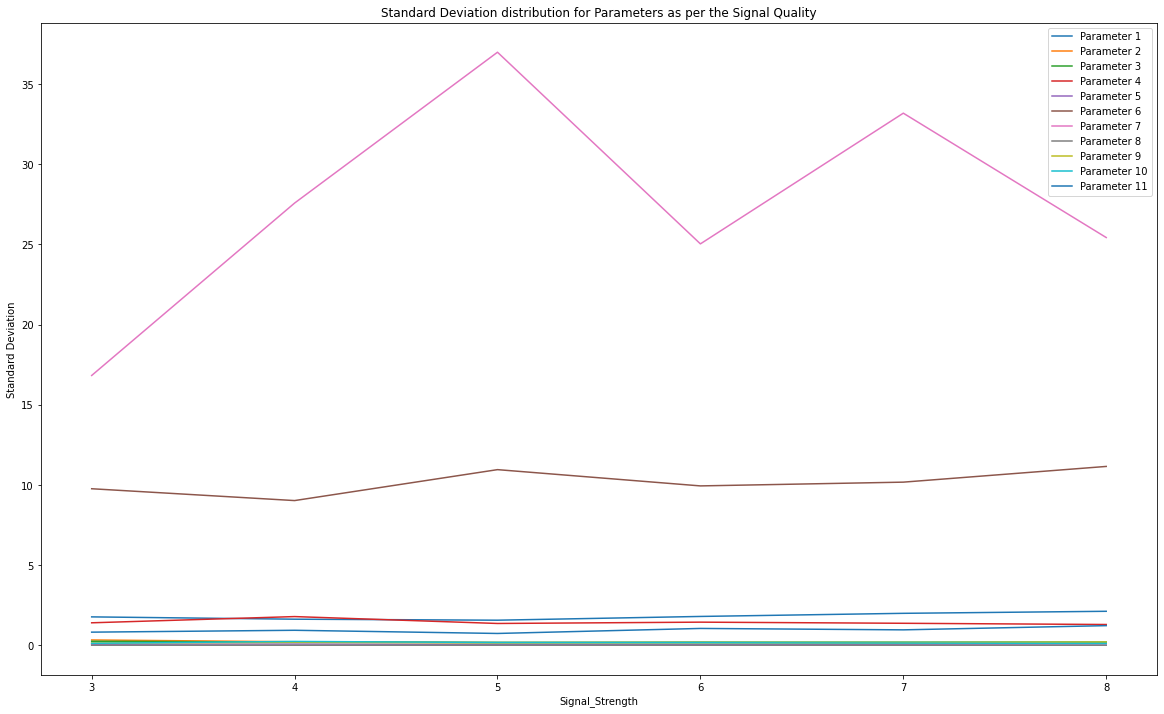

In [31]:
plt.figure(figsize=(20,12))
plt.title("Standard Deviation distribution for Parameters as per the Signal Quality")
plt.xlabel("Signal_Strength")
plt.ylabel("Standard Deviation")
plt.plot(dataframe_taken["std"].T)
plt.legend(dataframe_taken["std"].T.columns)
plt.show

In [32]:
data2=data.drop(["Signal_Strength"],axis=1)

In [33]:
data2.corr()[(data2.corr()>0.6) | (data2.corr()<-0.6)]

Parameter 1  Parameter 2  Parameter 3  Parameter 4  Parameter 5  \
Parameter 1      1.000000          NaN     0.671703          NaN          NaN   
Parameter 2           NaN          1.0          NaN          NaN          NaN   
Parameter 3      0.671703          NaN     1.000000          NaN          NaN   
Parameter 4           NaN          NaN          NaN          1.0          NaN   
Parameter 5           NaN          NaN          NaN          NaN          1.0   
Parameter 6           NaN          NaN          NaN          NaN          NaN   
Parameter 7           NaN          NaN          NaN          NaN          NaN   
Parameter 8      0.668047          NaN          NaN          NaN          NaN   
Parameter 9     -0.682978          NaN          NaN          NaN          NaN   
Parameter 10          NaN          NaN          NaN          NaN          NaN   
Parameter 11          NaN          NaN          NaN          NaN          NaN   

              Parameter 6  Parameter 7  Parameter 8  Parameter 9  \
Parameter 1           NaN          NaN     0.668047    -0.682978   
Parameter 2           NaN          NaN          NaN          NaN   
Parameter 3           NaN          NaN          NaN          NaN   
Parameter 4           NaN          NaN          NaN          NaN   
Parameter 5           NaN          NaN          NaN          NaN   
Parameter 6      1.000000     0.667666          NaN          NaN   
Parameter 7      0.667666     1.000000          NaN          NaN   
Parameter 8           NaN          NaN     1.000000          NaN   
Parameter 9           NaN          NaN          NaN     1.000000   
Parameter 10          NaN          NaN          NaN          NaN   
Parameter 11          NaN          NaN          NaN          NaN   

              Parameter 10  Parameter 11  
Parameter 1            NaN           NaN  
Parameter 2            NaN           NaN  
Parameter 3            NaN           NaN  
Parameter 4            NaN           NaN  
Parameter 5            NaN           NaN  
Parameter 6            NaN           NaN  
Parameter 7            NaN           NaN  
Parameter 8            NaN           NaN  
Parameter 9            NaN           NaN  
Parameter 10           1.0           NaN  
Parameter 11           NaN           1.0

Parameter 2 has no correlation with any of the other parameters. So, it looks like a real independent and non-redundant column and hence of crucial and very important. But the distribution plot of the parameters indicates otherwise stating that most probably the parameter doesn't play any role at all in determining whether the Signal has proper strength or not.

The same Story aplies for Parameter 4 and Parameter 5. Scatterplots speak the same in this case too.

Most of the action seems to be happening with Parameter 1, in connection with Parameter8, Parameter8, Parameter9.

In [34]:
parameter_interest1=["Parameter 1", "Parameter 3", "Parameter 6", "Parameter 7", "Parameter 8", "Parameter 9"]
parameter_other=data2.columns.drop(parameter_interest1)

In [35]:
parameter_other

Index(['Parameter 2', 'Parameter 4', 'Parameter 5', 'Parameter 10',
       'Parameter 11'],
      dtype='object')

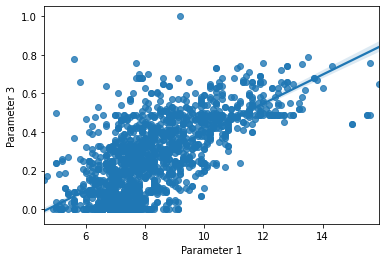

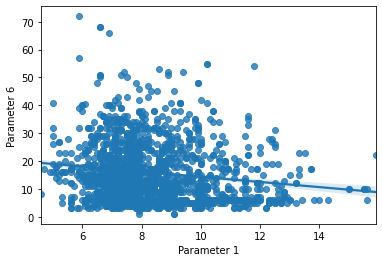

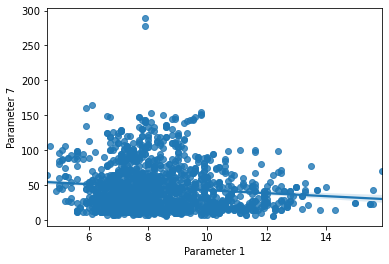

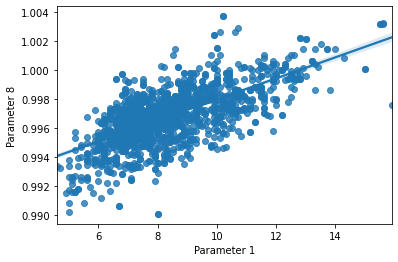

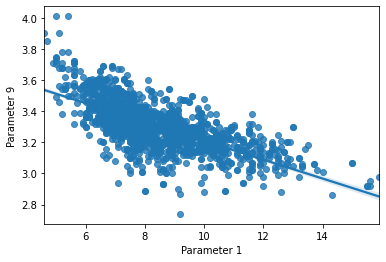

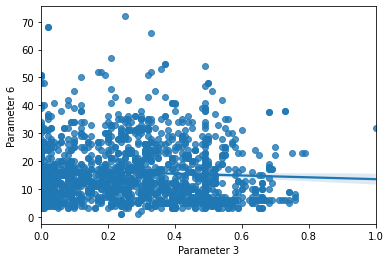

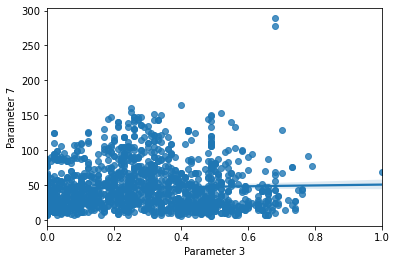

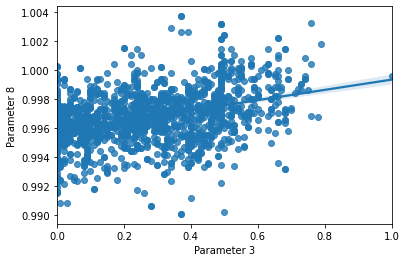

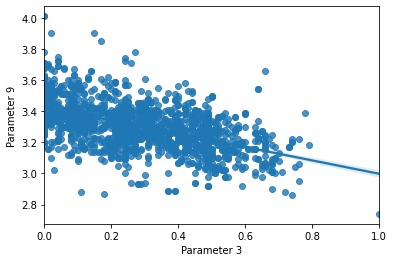

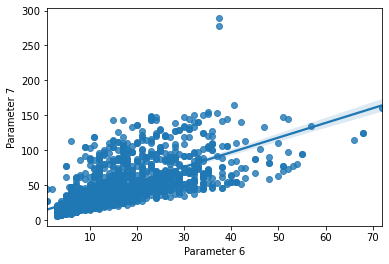

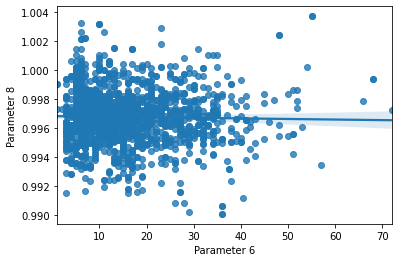

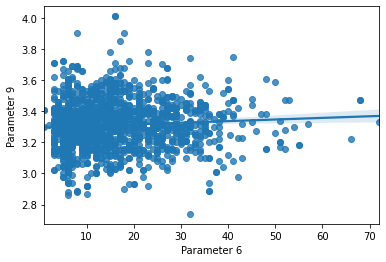

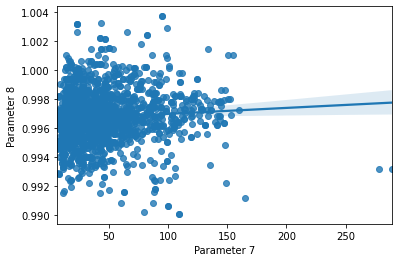

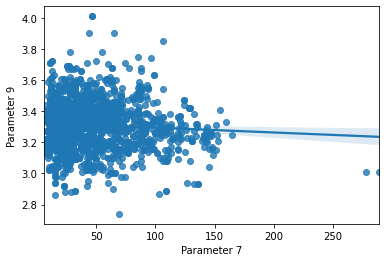

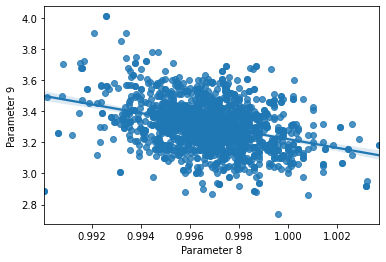

In [36]:
for each1,each2 in itertools.combinations(parameter_interest1,2):
    sns.regplot(x=data[each1],y=data[each2])
    plt.show()
    plt.close() # None of the functions are completely nonlinear.

<AxesSubplot:title={'center':'Correlation Measurement'}>

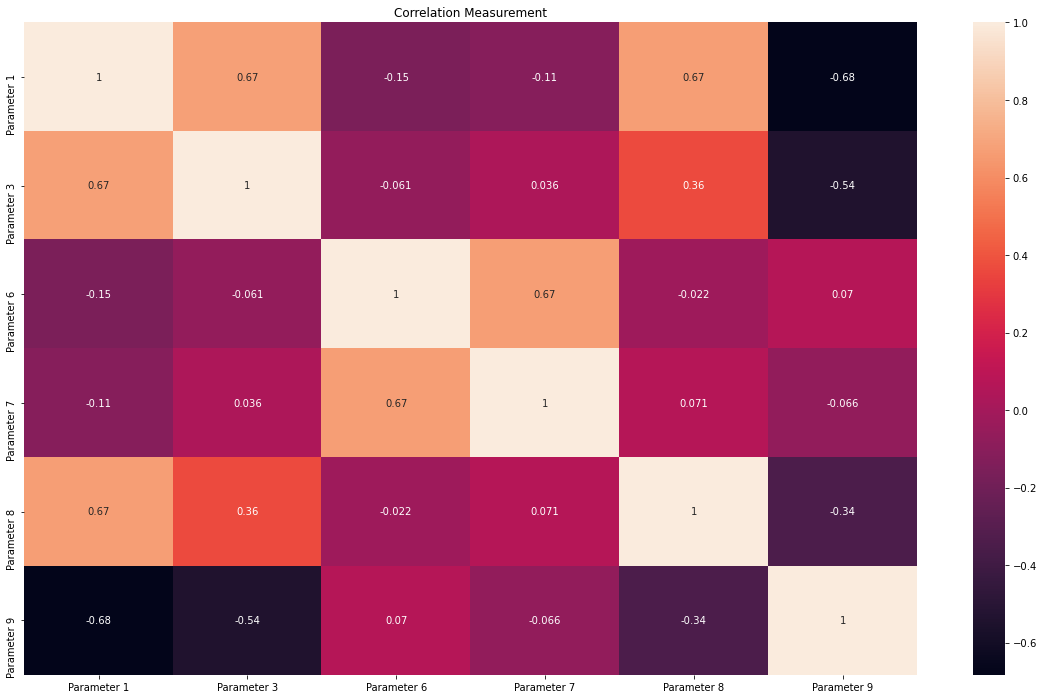

In [37]:
plt.figure(figsize=(20,12))
plt.title("Correlation Measurement")
sns.heatmap(data2[parameter_interest1].corr(),annot=True)

<AxesSubplot:title={'center':'Correlation Measurement'}>

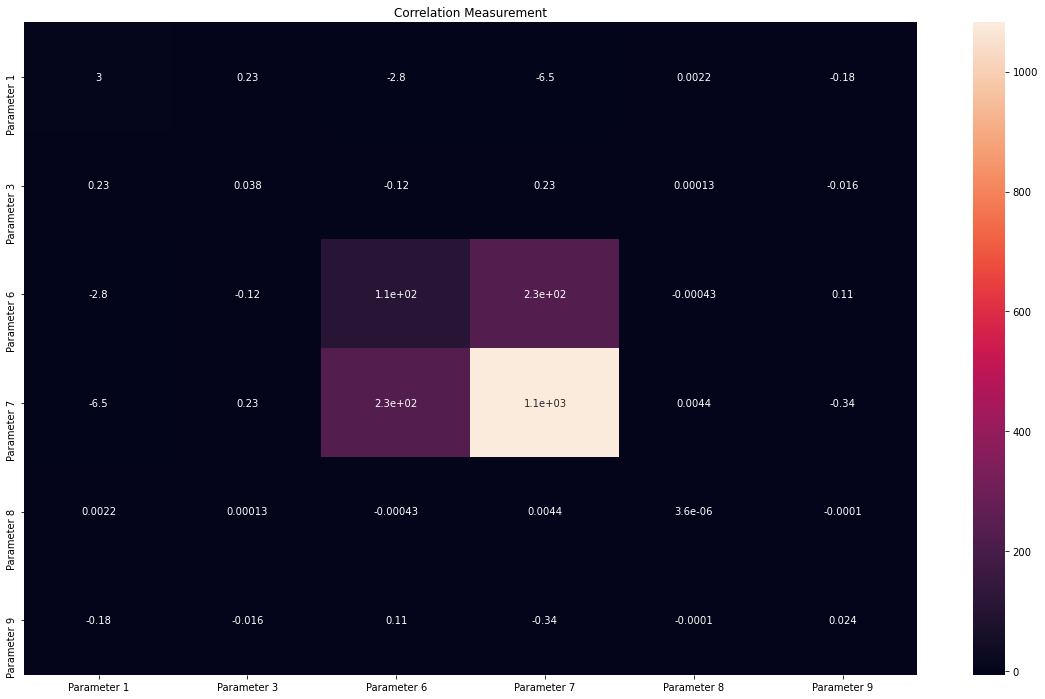

In [38]:
plt.figure(figsize=(20,12))
plt.title("Correlation Measurement")
sns.heatmap(data2[parameter_interest1].cov(),annot=True)

Thre is a only a very little difference between using Neural Network as a regressor and Neural network as a classifier. Only the output layer and the softmax function that changes the scenario. So,keeping that in the mind, we can first go for training it as a regressor, then we can make a small modification to our original data and make it as an classifier column and then go for the classifier Neural Network.


In [39]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense
from tensorflow.keras import regularizers, optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import BatchNormalization, Dropout

In [40]:
X_train1, X_valid, y_train1, y_valid = train_test_split(data, data.pop("Signal_Strength"), random_state=0)

In [41]:
X_train,X_test,y_train,y_test=train_test_split(X_train1,y_train1,test_size=0.30,random_state=0)

In [42]:
y_train1

140     5
1232    5
720     5
77      6
39      5
       ..
763     5
835     5
1216    6
559     6
684     5
Name: Signal_Strength, Length: 1199, dtype: category
Categories (6, int64): [3, 4, 5, 6, 7, 8]

In [43]:
X_valid


Parameter 1  Parameter 2  Parameter 3  Parameter 4  Parameter 5  \
1109         10.8        0.470         0.43         2.10        0.171   
1032          8.1        0.820         0.00         4.10        0.095   
1002          9.1        0.290         0.33         2.05        0.063   
487          10.2        0.645         0.36         1.80        0.053   
979          12.2        0.450         0.49         1.40        0.075   
...           ...          ...          ...          ...          ...   
489           9.3        0.390         0.40         2.60        0.073   
362          11.9        0.580         0.66         2.50        0.072   
526           7.3        0.365         0.49         2.50        0.088   
442          15.6        0.685         0.76         3.70        0.100   
1229          7.6        0.430         0.29         2.10        0.075   

      Parameter 6  Parameter 7  Parameter 8  Parameter 9  Parameter 10  \
1109         27.0         66.0      0.99820         3.17          0.76   
1032          5.0         14.0      0.99854         3.36          0.53   
1002         13.0         27.0      0.99516         3.26          0.84   
487           5.0         14.0      0.99820         3.17          0.42   
979           3.0          6.0      0.99690         3.13          0.63   
...           ...          ...          ...          ...           ...   
489          10.0         26.0      0.99840         3.34          0.75   
362           6.0         37.0      0.99920         3.05          0.56   
526          39.0        106.0      0.99660         3.36          0.78   
442           6.0         43.0      1.00320         2.95          0.68   
1229         19.0         66.0      0.99718         3.40          0.64   

      Parameter 11  
1109          10.8  
1032           9.6  
1002          11.7  
487           10.0  
979           10.4  
...            ...  
489           10.2  
362           10.0  
526           11.0  
442           11.2  
1229           9.5  

[400 rows x 11 columns]

In [140]:
y_train.astype("int64")

614     6
1163    5
1043    7
948     7
1290    5
       ..
1272    5
1211    5
1305    5
1030    7
856     6
Name: Signal_Strength, Length: 839, dtype: int64

In [44]:
import tensorflow.keras as k

<AxesSubplot:xlabel='Signal_Strength', ylabel='count'>

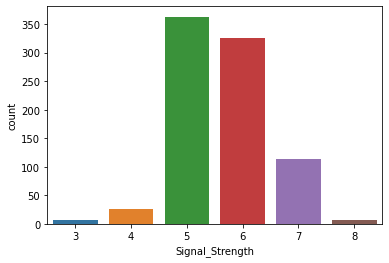

In [45]:
sns.countplot(y_train)

In [46]:
type(X_train1)

pandas.core.frame.DataFrame

In [47]:
X_train.shape

(839, 11)

# Categorical Neural Network

In [207]:
from tensorflow.keras.layers import Activation, Dense, Flatten
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Reshape
from tensorflow.keras.layers import BatchNormalization
###################################################################
#Categorical Neural Network
###################################################################
model_cat=k.Sequential()
model_cat.add(BatchNormalization(input_shape=(X_train.shape[1],)))
model_cat.add(Flatten())
model_cat.add(Dense(100,activation="relu",kernel_initializer='random_normal',bias_initializer='zeros',kernel_regularizer="l2",bias_regularizer="l2"))
model_cat.add(Dense(100,activation="relu",kernel_initializer='random_normal',bias_initializer='zeros',kernel_regularizer="l2",bias_regularizer="l2"))
model_cat.add(Dense(100,activation="relu",kernel_initializer='random_normal',bias_initializer='zeros',kernel_regularizer="l2",bias_regularizer="l2"))
model_cat.add(Dense(9,activation="softmax"))
sgd = optimizers.SGD(lr = 0.01)
model_cat.compile(optimizer = sgd, loss = 'mse', metrics =["Accuracy"])

t=time.time()
###################################################################
#
###################################################################
history_cat=model_cat.fit(X_train.to_numpy(),k.utils.to_categorical(y_train),validation_data = (X_valid.to_numpy(),k.utils.to_categorical(y_valid)),batch_size=20, epochs = 2000, verbose = 1)
print("Total Time Taken is : ",t-time.time())

Epoch 1/2000
42/42 [==============================] - 2s 13ms/step - loss: 0.6151 - accuracy: 0.0000e+00 - val_loss: 0.6089 - val_accuracy: 0.0000e+00
Epoch 2/2000
42/42 [==============================] - 0s 5ms/step - loss: 0.6063 - accuracy: 0.0000e+00 - val_loss: 0.6001 - val_accuracy: 0.0000e+00
Epoch 3/2000
42/42 [==============================] - 0s 5ms/step - loss: 0.5978 - accuracy: 0.0000e+00 - val_loss: 0.5915 - val_accuracy: 0.0000e+00
Epoch 4/2000
42/42 [==============================] - 0s 5ms/step - loss: 0.5893 - accuracy: 0.0000e+00 - val_loss: 0.5831 - val_accuracy: 0.0000e+00
Epoch 5/2000
42/42 [==============================] - 0s 5ms/step - loss: 0.5810 - accuracy: 0.0000e+00 - val_loss: 0.5749 - val_accuracy: 0.0000e+00
Epoch 6/2000
42/42 [==============================] - 0s 5ms/step - loss: 0.5729 - accuracy: 0.0000e+00 - val_loss: 0.5668 - val_accuracy: 0.0000e+00
Epoch 7/2000
42/42 [==============================] - 0s 5ms/step - loss: 0.5648 - accuracy: 0.0000

42/42 [==============================] - 0s 5ms/step - loss: 0.3017 - accuracy: 0.0000e+00 - val_loss: 0.2989 - val_accuracy: 0.0000e+00
Epoch 56/2000
42/42 [==============================] - 0s 5ms/step - loss: 0.2980 - accuracy: 0.0000e+00 - val_loss: 0.2953 - val_accuracy: 0.0000e+00
Epoch 57/2000
42/42 [==============================] - 0s 6ms/step - loss: 0.2947 - accuracy: 0.0000e+00 - val_loss: 0.2919 - val_accuracy: 0.0000e+00
Epoch 58/2000
42/42 [==============================] - 0s 5ms/step - loss: 0.2912 - accuracy: 0.0000e+00 - val_loss: 0.2885 - val_accuracy: 0.0000e+00
Epoch 59/2000
42/42 [==============================] - 0s 5ms/step - loss: 0.2876 - accuracy: 0.0000e+00 - val_loss: 0.2851 - val_accuracy: 0.0000e+00
Epoch 60/2000
42/42 [==============================] - 0s 5ms/step - loss: 0.2844 - accuracy: 0.0000e+00 - val_loss: 0.2818 - val_accuracy: 0.0000e+00
Epoch 61/2000
42/42 [==============================] - 0s 5ms/step - loss: 0.2813 - accuracy: 0.0000e+00 - v

42/42 [==============================] - 0s 5ms/step - loss: 0.1726 - accuracy: 0.0000e+00 - val_loss: 0.1713 - val_accuracy: 0.0000e+00
Epoch 110/2000
42/42 [==============================] - 0s 5ms/step - loss: 0.1717 - accuracy: 0.0000e+00 - val_loss: 0.1698 - val_accuracy: 0.0000e+00
Epoch 111/2000
42/42 [==============================] - 0s 5ms/step - loss: 0.1702 - accuracy: 0.0000e+00 - val_loss: 0.1683 - val_accuracy: 0.0000e+00
Epoch 112/2000
42/42 [==============================] - 0s 5ms/step - loss: 0.1682 - accuracy: 0.0000e+00 - val_loss: 0.1669 - val_accuracy: 0.0000e+00
Epoch 113/2000
42/42 [==============================] - 0s 5ms/step - loss: 0.1671 - accuracy: 0.0000e+00 - val_loss: 0.1655 - val_accuracy: 0.0000e+00
Epoch 114/2000
42/42 [==============================] - ETA: 0s - loss: 0.1658 - accuracy: 0.0000e+ - 0s 5ms/step - loss: 0.1655 - accuracy: 0.0000e+00 - val_loss: 0.1641 - val_accuracy: 0.0000e+00
Epoch 115/2000
42/42 [==============================] - 0

42/42 [==============================] - 0s 5ms/step - loss: 0.1195 - accuracy: 0.0000e+00 - val_loss: 0.1184 - val_accuracy: 0.0000e+00
Epoch 163/2000
42/42 [==============================] - 0s 6ms/step - loss: 0.1189 - accuracy: 0.0000e+00 - val_loss: 0.1177 - val_accuracy: 0.0000e+00
Epoch 164/2000
42/42 [==============================] - 0s 10ms/step - loss: 0.1188 - accuracy: 0.0000e+00 - val_loss: 0.1171 - val_accuracy: 0.0000e+00
Epoch 165/2000
42/42 [==============================] - 0s 7ms/step - loss: 0.1182 - accuracy: 0.0000e+00 - val_loss: 0.1165 - val_accuracy: 0.0000e+00
Epoch 166/2000
42/42 [==============================] - 0s 6ms/step - loss: 0.1171 - accuracy: 0.0000e+00 - val_loss: 0.1159 - val_accuracy: 0.0000e+00
Epoch 167/2000
42/42 [==============================] - 0s 7ms/step - loss: 0.1165 - accuracy: 0.0000e+00 - val_loss: 0.1153 - val_accuracy: 0.0000e+00
Epoch 168/2000
42/42 [==============================] - 0s 6ms/step - loss: 0.1155 - accuracy: 0.0000e

Epoch 216/2000
42/42 [==============================] - 0s 9ms/step - loss: 0.0958 - accuracy: 0.0000e+00 - val_loss: 0.0951 - val_accuracy: 0.0000e+00
Epoch 217/2000
42/42 [==============================] - 0s 6ms/step - loss: 0.0954 - accuracy: 0.0000e+00 - val_loss: 0.0948 - val_accuracy: 0.0000e+00
Epoch 218/2000
42/42 [==============================] - ETA: 0s - loss: 0.0965 - accuracy: 0.0000e+ - 0s 6ms/step - loss: 0.0964 - accuracy: 0.0000e+00 - val_loss: 0.0946 - val_accuracy: 0.0000e+00
Epoch 219/2000
42/42 [==============================] - 0s 5ms/step - loss: 0.0955 - accuracy: 0.0000e+00 - val_loss: 0.0943 - val_accuracy: 0.0000e+00
Epoch 220/2000
42/42 [==============================] - 0s 6ms/step - loss: 0.0953 - accuracy: 0.0000e+00 - val_loss: 0.0940 - val_accuracy: 0.0000e+00
Epoch 221/2000
42/42 [==============================] - 0s 5ms/step - loss: 0.0952 - accuracy: 0.0000e+00 - val_loss: 0.0938 - val_accuracy: 0.0000e+00
Epoch 222/2000
42/42 [====================

42/42 [==============================] - 0s 5ms/step - loss: 0.0865 - accuracy: 0.0000e+00 - val_loss: 0.0850 - val_accuracy: 0.0000e+00
Epoch 270/2000
42/42 [==============================] - 0s 5ms/step - loss: 0.0864 - accuracy: 0.0000e+00 - val_loss: 0.0849 - val_accuracy: 0.0000e+00
Epoch 271/2000
42/42 [==============================] - 0s 5ms/step - loss: 0.0862 - accuracy: 0.0000e+00 - val_loss: 0.0847 - val_accuracy: 0.0000e+00
Epoch 272/2000
42/42 [==============================] - 0s 5ms/step - loss: 0.0854 - accuracy: 0.0000e+00 - val_loss: 0.0846 - val_accuracy: 0.0000e+00
Epoch 273/2000
42/42 [==============================] - 0s 5ms/step - loss: 0.0851 - accuracy: 0.0000e+00 - val_loss: 0.0845 - val_accuracy: 0.0000e+00
Epoch 274/2000
42/42 [==============================] - 0s 5ms/step - loss: 0.0853 - accuracy: 0.0000e+00 - val_loss: 0.0844 - val_accuracy: 0.0000e+00
Epoch 275/2000
42/42 [==============================] - 0s 5ms/step - loss: 0.0853 - accuracy: 0.0000e+

Epoch 323/2000
42/42 [==============================] - 0s 5ms/step - loss: 0.0818 - accuracy: 0.0000e+00 - val_loss: 0.0801 - val_accuracy: 0.0000e+00
Epoch 324/2000
42/42 [==============================] - 0s 5ms/step - loss: 0.0816 - accuracy: 0.0000e+00 - val_loss: 0.0801 - val_accuracy: 0.0000e+00
Epoch 325/2000
42/42 [==============================] - 0s 5ms/step - loss: 0.0813 - accuracy: 0.0000e+00 - val_loss: 0.0800 - val_accuracy: 0.0000e+00
Epoch 326/2000
42/42 [==============================] - 0s 7ms/step - loss: 0.0806 - accuracy: 0.0000e+00 - val_loss: 0.0799 - val_accuracy: 0.0000e+00
Epoch 327/2000
42/42 [==============================] - 0s 5ms/step - loss: 0.0807 - accuracy: 0.0000e+00 - val_loss: 0.0799 - val_accuracy: 0.0000e+00
Epoch 328/2000
42/42 [==============================] - 0s 5ms/step - loss: 0.0814 - accuracy: 0.0000e+00 - val_loss: 0.0798 - val_accuracy: 0.0000e+00
Epoch 329/2000
42/42 [==============================] - 0s 5ms/step - loss: 0.0812 - acc

KeyboardInterrupt: 

In [ ]:
y_pred_reg=model_cat.predict(X_test)
y_pred_reg

# Regressional Neural Network

In [215]:
from tensorflow.keras.layers import Activation, Dense, Flatten
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Reshape
from tensorflow.keras.layers import BatchNormalization
###################################################################
#Regressional Neural Network
###################################################################
model_reg=k.Sequential()
model_reg.add(BatchNormalization(input_shape=(X_train.shape[1],)))
model_reg.add(Flatten())
model_reg.add(Dense(100,activation="relu",kernel_initializer='random_uniform',bias_initializer='zeros',kernel_regularizer="l2",bias_regularizer="l2"))
model_reg.add(Dense(100,activation="relu",kernel_initializer='random_uniform',bias_initializer='zeros',kernel_regularizer="l2",bias_regularizer="l2"))
model_reg.add(Dense(10,activation="relu",kernel_initializer='random_uniform',bias_initializer='zeros',kernel_regularizer="l2",bias_regularizer="l2"))
model_reg.add(Dense(1,activation="relu"))
sgd = optimizers.SGD(lr = 0.01)
model_reg.compile(optimizer = sgd, loss = 'mse', metrics =k.metrics.MeanSquaredError())
###################################################################
#
###################################################################

t=time.time()
history_reg=model_reg.fit(X_train.to_numpy(),y_train,validation_data = (X_valid.to_numpy(),y_valid),batch_size=20, epochs = 200, verbose = 1)
print("Total Time Taken is : ",t-time.time())

Epoch 1/200
42/42 [==============================] - 2s 14ms/step - loss: 15.4093 - mean_squared_error: 15.2967 - val_loss: 0.7455 - val_mean_squared_error: 0.6111
Epoch 2/200
42/42 [==============================] - 0s 5ms/step - loss: 0.7507 - mean_squared_error: 0.6163 - val_loss: 0.7020 - val_mean_squared_error: 0.5694
Epoch 3/200
42/42 [==============================] - 0s 4ms/step - loss: 0.6937 - mean_squared_error: 0.5608 - val_loss: 0.7849 - val_mean_squared_error: 0.6521
Epoch 4/200
42/42 [==============================] - 0s 5ms/step - loss: 0.6192 - mean_squared_error: 0.4868 - val_loss: 0.6149 - val_mean_squared_error: 0.4843
Epoch 5/200
42/42 [==============================] - 0s 4ms/step - loss: 0.5705 - mean_squared_error: 0.4401 - val_loss: 0.6643 - val_mean_squared_error: 0.5336
Epoch 6/200
42/42 [==============================] - 0s 4ms/step - loss: 0.5829 - mean_squared_error: 0.4535 - val_loss: 0.5442 - val_mean_squared_error: 0.4167
Epoch 7/200
42/42 [============

42/42 [==============================] - 0s 5ms/step - loss: 0.5122 - mean_squared_error: 0.4314 - val_loss: 0.4946 - val_mean_squared_error: 0.4138
Epoch 52/200
42/42 [==============================] - 0s 5ms/step - loss: 0.4977 - mean_squared_error: 0.4175 - val_loss: 0.4929 - val_mean_squared_error: 0.4128
Epoch 53/200
42/42 [==============================] - 0s 5ms/step - loss: 0.4842 - mean_squared_error: 0.4048 - val_loss: 0.4874 - val_mean_squared_error: 0.4080
Epoch 54/200
42/42 [==============================] - 0s 4ms/step - loss: 0.4983 - mean_squared_error: 0.4194 - val_loss: 0.4688 - val_mean_squared_error: 0.3914
Epoch 55/200
42/42 [==============================] - 0s 4ms/step - loss: 0.4591 - mean_squared_error: 0.3816 - val_loss: 0.4963 - val_mean_squared_error: 0.4180
Epoch 56/200
42/42 [==============================] - 0s 4ms/step - loss: 0.4884 - mean_squared_error: 0.4109 - val_loss: 0.4959 - val_mean_squared_error: 0.4185
Epoch 57/200
42/42 [=====================

42/42 [==============================] - 0s 4ms/step - loss: 0.4565 - mean_squared_error: 0.3997 - val_loss: 0.4418 - val_mean_squared_error: 0.3857
Epoch 102/200
42/42 [==============================] - 0s 4ms/step - loss: 0.4513 - mean_squared_error: 0.3948 - val_loss: 0.4681 - val_mean_squared_error: 0.4111
Epoch 103/200
42/42 [==============================] - 0s 4ms/step - loss: 0.4457 - mean_squared_error: 0.3892 - val_loss: 0.4473 - val_mean_squared_error: 0.3914
Epoch 104/200
42/42 [==============================] - 0s 4ms/step - loss: 0.4476 - mean_squared_error: 0.3914 - val_loss: 0.4479 - val_mean_squared_error: 0.3921
Epoch 105/200
42/42 [==============================] - 0s 5ms/step - loss: 0.4865 - mean_squared_error: 0.4307 - val_loss: 0.4700 - val_mean_squared_error: 0.4141
Epoch 106/200
42/42 [==============================] - 0s 5ms/step - loss: 0.4618 - mean_squared_error: 0.4064 - val_loss: 0.4405 - val_mean_squared_error: 0.3860
Epoch 107/200
42/42 [===============

42/42 [==============================] - 0s 5ms/step - loss: 0.4414 - mean_squared_error: 0.3941 - val_loss: 0.4274 - val_mean_squared_error: 0.3804
Epoch 152/200
42/42 [==============================] - 0s 5ms/step - loss: 0.4261 - mean_squared_error: 0.3793 - val_loss: 0.4466 - val_mean_squared_error: 0.3992
Epoch 153/200
42/42 [==============================] - 0s 4ms/step - loss: 0.4338 - mean_squared_error: 0.3869 - val_loss: 0.4305 - val_mean_squared_error: 0.3836
Epoch 154/200
42/42 [==============================] - 0s 5ms/step - loss: 0.4823 - mean_squared_error: 0.4356 - val_loss: 0.4322 - val_mean_squared_error: 0.3854
Epoch 155/200
42/42 [==============================] - 0s 4ms/step - loss: 0.4146 - mean_squared_error: 0.3677 - val_loss: 0.4244 - val_mean_squared_error: 0.3785
Epoch 156/200
42/42 [==============================] - 0s 5ms/step - loss: 0.4926 - mean_squared_error: 0.4462 - val_loss: 0.4376 - val_mean_squared_error: 0.3911
Epoch 157/200
42/42 [===============

In [212]:
y_pred_reg=model_reg.predict(X_test).astype("int64")
y_pred_reg

array([[5],
       [5],
       [5],
       [5],
       [5],
       [5],
       [5],
       [5],
       [5],
       [5],
       [5],
       [5],
       [5],
       [5],
       [5],
       [5],
       [5],
       [6],
       [6],
       [6],
       [4],
       [6],
       [5],
       [6],
       [5],
       [5],
       [5],
       [7],
       [5],
       [5],
       [5],
       [5],
       [6],
       [5],
       [6],
       [7],
       [5],
       [5],
       [7],
       [7],
       [4],
       [5],
       [5],
       [5],
       [6],
       [6],
       [5],
       [5],
       [7],
       [5],
       [5],
       [5],
       [6],
       [5],
       [5],
       [6],
       [5],
       [5],
       [6],
       [6],
       [5],
       [6],
       [4],
       [4],
       [6],
       [6],
       [6],
       [5],
       [6],
       [5],
       [6],
       [6],
       [5],
       [5],
       [5],
       [5],
       [5],
       [5],
       [4],
       [6],
       [5],
       [5],
       [5],
    

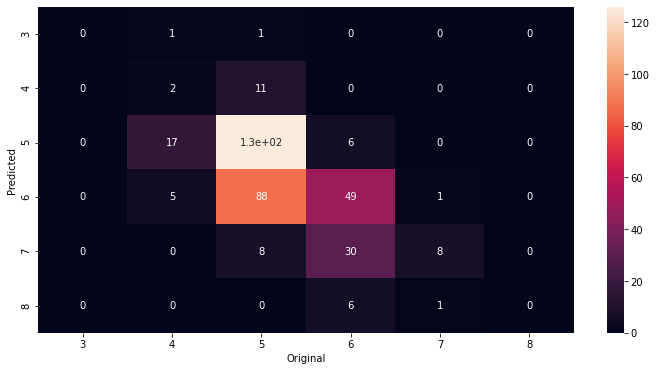

In [214]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(12,6))
sns.heatmap(confusion_matrix(y_test,y_pred_reg),xticklabels=y_test.dtype.categories,yticklabels=y_test.dtype.categories,annot=True)
plt.xlabel("Original")
plt.ylabel("Predicted")
plt.show()

In [155]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
model.summary()

In [54]:
y_pred[1][0]

1.647769e-05